In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [5]:
(x_train_image,y_train_label),(x_test_image,y_test_label) = tf.keras.datasets.cifar10.load_data()
x_train_normalize = x_train_image.astype('float32')/255
x_test_normalize = x_test_image.astype('float32')/255
y_train_OneHot = tf.keras.utils.to_categorical(y_train_label)
y_test_OneHot = tf.keras.utils.to_categorical(y_test_label)

170500096/170498071 [==============================] - 23s 0us/step


In [6]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,input_shape=(32,32,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2,strides=2,padding='same'))
model.add(keras.layers.Conv2D(filters=128,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2,strides=2,padding='same'))
model.add(keras.layers.Conv2D(filters=256,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.Conv2D(filters=256,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2,strides=2,padding='same'))
model.add(keras.layers.Conv2D(filters=512,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.Conv2D(filters=512,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2,strides=2,padding='same'))
model.add(keras.layers.Conv2D(filters=512,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.Conv2D(filters=512,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2,strides=2,padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4096,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(4096,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_train = model.fit(x=x_train_normalize,y=y_train_OneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=1)

Epoch 1/10
134/134 [==============================] - 11s 81ms/step - loss: 2.0298 - accuracy: 0.2000 - val_loss: 1.8637 - val_accuracy: 0.2799
Epoch 2/10
134/134 [==============================] - 10s 74ms/step - loss: 1.6340 - accuracy: 0.3593 - val_loss: 1.5154 - val_accuracy: 0.4288
Epoch 3/10
134/134 [==============================] - 10s 75ms/step - loss: 1.3514 - accuracy: 0.4967 - val_loss: 1.3563 - val_accuracy: 0.5035
Epoch 4/10
134/134 [==============================] - 10s 75ms/step - loss: 1.1472 - accuracy: 0.5873 - val_loss: 1.0862 - val_accuracy: 0.6142
Epoch 5/10
134/134 [==============================] - 10s 75ms/step - loss: 0.9827 - accuracy: 0.6475 - val_loss: 1.0872 - val_accuracy: 0.6198
Epoch 6/10
134/134 [==============================] - 10s 75ms/step - loss: 0.8524 - accuracy: 0.6994 - val_loss: 0.9315 - val_accuracy: 0.6834
Epoch 7/10
134/134 [==============================] - 10s 75ms/step - loss: 0.7360 - accuracy: 0.7412 - val_loss: 0.8834 - val_accuracy:

In [8]:
def train_history(model_train,train,val):
    plt.plot(model_train.history[train])
    plt.plot(model_train.history[val])
    plt.title('Train History')
    plt.xlabel('epoch')
    plt.ylabel(train)
    plt.legend(['train','validation'],loc='upper left')

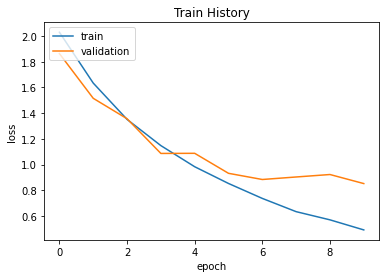

In [9]:
train_history(model_train,'loss','val_loss')

In [10]:
scores = model.evaluate(x_test_normalize,y_test_OneHot,verbose=2)

313/313 - 2s - loss: 0.8709 - accuracy: 0.7192
